In [136]:
!pip install japanize-matplotlib &>/dev/null # 日本語フォントをダウンロードする。
from matplotlib import pylab as plt
import japanize_matplotlib
plt.rcParams["figure.dpi"]=120

import numpy as np
import pandas as pd

from pprint import pprint as pprint

def calcSIR(S,I,R,dI,dR,dS,BETA,GAMMA,MaxdI=float('inf'),lockdownrate=0.7):
    rawBETA=np.copy(BETA)
    lockdownBETA=np.copy(BETA)*lockdownrate
    for t in range(1,NUM_OF_DAYS): #t日目について
        #print("S[-1]*I[-1]=",S[-1]*I[-1])
        dS.append(-BETA*(S[-1]*I[-1]))#(4,1)*(4,2)=>(4,2)．(4,2)*(4,2)=>(4,2)
        dR.append(I[-1]*GAMMA)
        dI.append(-dS[-1]-dR[-1])#-(4,2)-(4,2)=>(4,2)
        #print("np.sum(dS[-1],axis=1,keepdims=True)=",np.sum(dS[-1],axis=1,keepdims=True))
        s=S[-1]+np.sum(dS[-1],axis=1,keepdims=True)
        #print("s=",s)
        #S.append(np.where(0 < s, s, 0))
        S.append(s)
        #print("S[-1]new=",S[-1])
        i=I[-1]+dI[-1]
        I.append(np.where(0 < i, i, 0))
        #I.append(i)
        #print("i=",i)
        R.append(R[-1]+np.sum(dR[-1],axis=1,keepdims=True))

        prefectures=["東京","埼玉","千葉","神奈川"]
        for k, p in enumerate(prefectures):
            if(MaxdI/1000000*N[k]<abs(np.sum(dS[-1],axis=1)[k])):
                BETA[k]=lockdownBETA[k]
                #print(t,"緊急事態宣言中! BETA["+p+"](x0.8)=",BETA[k])
                #print(t,"MaxdI/1000000*N["+p+"]=",MaxdI/1000000*N[k])
                #print(t,"np.sum(dS[-1],axis=1)["+p+"])=",np.sum(dS[-1],axis=1)[k])
            else:
                BETA[k]=rawBETA[k]
                #print(t,"緊急事態宣言解除!BETA["+p+"]=",BETA[k])

    print("dS[1]=",dS[1])
    print("dI[1]=",dI[1])
    print("dR[1]=",dR[1])
    print("S[1]=",S[1])
    print("I[1]=",I[1])
    print("R[1]=",R[1])
    print("S[1]*I[1]=",S[1]*I[1])
    print("dS[-1]=",dS[-1])
    print("dI[-1]=",dI[-1])
    print("dR[-1]=",dR[-1])
    print("S[-1]=",S[-1])
    print("I[-1]=",I[-1])
    print("R[-1]=",R[-1])
    print("S[1]*I[1]=",S[-1]*I[-1])
    #print("np.sum(dS[-1], axis=1)=",np.sum(dS[-1], axis=1))

In [154]:
NUM_OF_DAYS=300

#GAMMA=np.array([[1/15.7,1/15.7]])#回復率．γ=1/(感染者の平均回復日数)とすることができるらしいので．回復日数を15.7日として
GAMMA=np.array([[1/4,1/4]]) #回復率．γ=1/(感染から隔離されるまでの日数)とすることができるらしいので．
#R0=np.array([[3, 3*1.32]])
R0=np.array([[0.94, 1.23]])
#1.32倍（95％信頼区間1.28-1.37）https://www.niid.go.jp/niid/ja/diseases/ka/corona-virus/2019-ncov/10279-covid19-40.html
#0.94 (95%信頼区間 0.90-0.97)，1.23 (95%信頼区間 1.18-1.28)

#N=np.array([[10000000], # 東京 (総人口，推計人口2021年4月1日)
#            [10000000], # 埼玉
#            [10000000], # 千葉
#            [10000000]])# 神奈川
N=np.array([[13971109], # 東京 (総人口，推計人口2021年4月1日)
             [7343453], # 埼玉
             [6281394], # 千葉
             [9214151]])# 神奈川

S=[np.copy(N)]
#I=[np.array([[1,1], #  東京
#             [1,1], # 埼玉
#             [1,1], # 千葉
#             [1,1]])]# 神奈川
I=[np.array([[1541*(1-0.03),1541*0.03], #  東京 3%
             [ 642.3*(1-0.03), 642.3*0.03], # 埼玉
             [ 582.4*(1-0.03), 582.4*0.03], # 千葉
             [ 834.9*(1-0.03), 834.9*0.03]])]# 神奈川
R=[np.array([[0], #  東京
             [0], # 埼玉
             [0], # 千葉
             [0]])]# 神奈川

dS=[np.array([[0,0], #  東京
             [0,0], # 埼玉
             [0,0], # 千葉
             [0,0]])]# 神奈川
dI=[np.array([[0,0], #  東京
             [0,0], # 埼玉
             [0,0], # 千葉
             [0,0]])]# 神奈川
dR=[np.array([[0,0], #  東京
             [0,0], # 埼玉
             [0,0], # 千葉
             [0,0]])]# 神奈川

# R0=β/γ
print("γ=",GAMMA)
print("R0=",R0)
print("β=R0*γ=",R0*GAMMA)
BETA=np.dot(1/N,R0*GAMMA) #BETA=R0*GAMMA/N (R0の定義より)
print("β/N=",BETA)


#calcSIR(S,I,R,dI,dR,dS,BETA,GAMMA,MaxdI=1,lockdownrate=0.3)#MaxdIは人口十万人あたり
calcSIR(S,I,R,dI,dR,dS,BETA,GAMMA)#MaxdIは人口十万人あたり

γ= [[0.25 0.25]]
R0= [[0.94 1.23]]
β=R0*γ= [[0.235  0.3075]]
β/N= [[1.68204256e-08 2.20097059e-08]
 [3.20012942e-08 4.18740339e-08]
 [3.74120776e-08 4.89541016e-08]
 [2.55042488e-08 3.33725809e-08]]
dS[1]= [[-351.27095    -14.215725 ]
 [-146.412285    -5.9252175]
 [-132.75808     -5.37264  ]
 [-190.315455    -7.7019525]]
dI[1]= [[-22.42155     2.658225 ]
 [ -9.345465    1.1079675]
 [ -8.47392     1.00464  ]
 [-12.147795    1.4402025]]
dR[1]= [[373.6925   11.5575 ]
 [155.75775   4.81725]
 [141.232     4.368  ]
 [202.46325   6.26175]]
S[1]= [[13970743.513325 ]
 [ 7343300.6624975]
 [ 6281255.86928  ]
 [ 9213952.9825925]]
I[1]= [[1472.34845     48.888225 ]
 [ 613.685535    20.3769675]
 [ 556.45408     18.47664  ]
 [ 797.705205    26.4872025]]
R[1]= [[385.25 ]
 [160.575]
 [145.6  ]
 [208.725]]
S[1]*I[1]= [[2.05698026e+10 6.83004852e+08]
 [4.50647740e+09 1.49634199e+08]
 [3.49523046e+09 1.16056503e+08]
 [7.35001825e+09 2.44051838e+08]]
dS[-1]= [[-8.01590554e-05 -4.70480621e+02]
 [-4.75166800

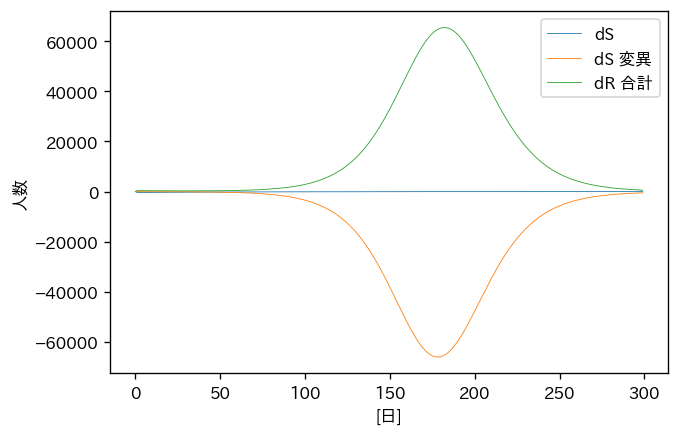

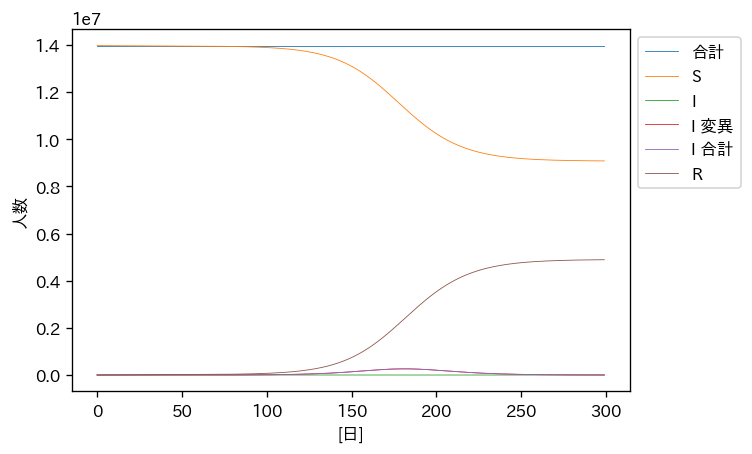

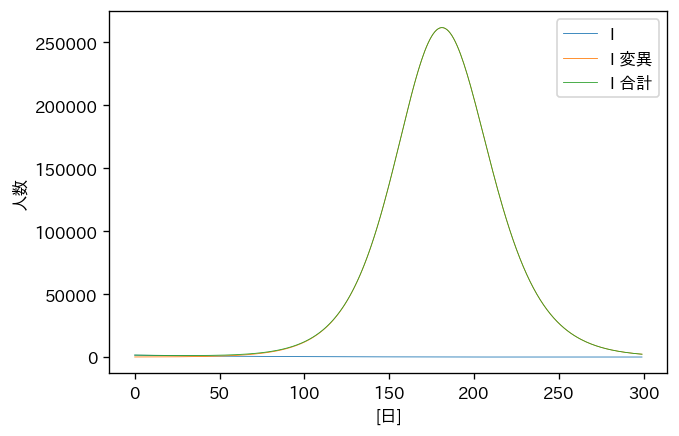

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in log10


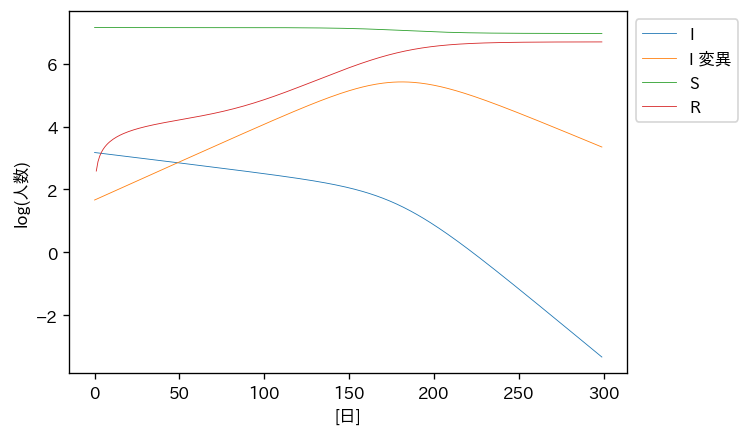

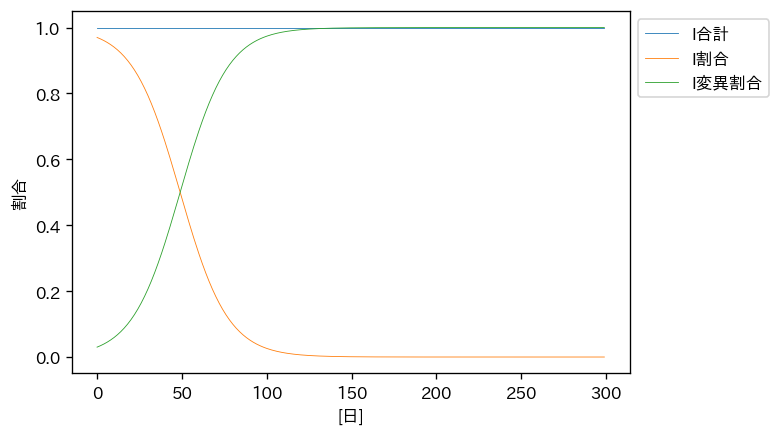

In [155]:
# plot

T=range(0,NUM_OF_DAYS)
s_plt={}
i_plt={}
r_plt={}
sum_plt={}
ds_plt={}
di_plt={}
dr_plt={}

prefectures=["東京","埼玉","千葉","神奈川"]
for k, p in enumerate(prefectures):
    for t in T:
        #print(t)
        try:
            s_plt[p].append(S[t][k][0])
        except KeyError:
            s_plt[p]=[S[t][k][0]]

        try:
            ds_plt[p].append(dS[t][k][0])
        except KeyError:
            ds_plt[p]=[dS[t][k][0]]
        try:
            ds_plt[p+" 変異"].append(dS[t][k][1])
        except KeyError:
            ds_plt[p+" 変異"]=[dS[t][k][1]]


        try:
            i_plt[p+" 合計"].append(I[t][k][0]+I[t][k][1])
        except KeyError:
            i_plt[p+" 合計"]=[I[t][k][0]+I[t][k][1]]
        try:
            i_plt[p].append(I[t][k][0])
        except KeyError:
            i_plt[p]=[I[t][k][0]]

        try:
            i_plt[p+" 変異"].append(I[t][k][1])
        except KeyError:
            i_plt[p+" 変異"]=[I[t][k][1]]

        try:
            di_plt[p].append(dI[t][k][0])
        except KeyError:
            di_plt[p]=[dI[t][k][0]]
        try:
            di_plt[p+" 変異"].append(dI[t][k][1])
        except KeyError:
            di_plt[p+" 変異"]=[dI[t][k][1]]

        try:
            r_plt[p].append(R[t][k][0])
        except KeyError:
            r_plt[p]=[R[t][k][0]]

        try:
            dr_plt[p].append(dR[t][k][0])
        except KeyError:
            dr_plt[p]=[dR[t][k][0]]
        try:
            dr_plt[p+" 変異"].append(dR[t][k][1])
        except KeyError:
            dr_plt[p+" 変異"]=[dR[t][k][1]]
        try:
            dr_plt[p+" 合計"].append(dR[t][k][0]+dR[t][k][1])
        except KeyError:
            dr_plt[p+" 合計"]=[dR[t][k][0]+dR[t][k][1]]

        try:
            sum_plt[p].append(S[t][k][0]+I[t][k][0]+I[t][k][1]+R[t][k][0])
        except KeyError:
            sum_plt[p]=[S[t][k][0]+I[t][k][0]+I[t][k][1]+R[t][k][0]]


plt.plot(ds_plt["東京"], label="dS", linewidth=.5)
plt.plot(ds_plt["東京 変異"], label="dS 変異", linewidth=.5)
#plt.plot(di_plt["東京"], label="dI", linewidth=.5)
#plt.plot(di_plt["東京 変異"], label="dI 変異", linewidth=.5)
plt.plot(dr_plt["東京 合計"], label="dR 合計", linewidth=.5)
plt.xlabel("[日]")
plt.ylabel("人数")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.plot(sum_plt["東京"], label="合計", linewidth=.5)#for validation
plt.plot(s_plt["東京"], label="S", linewidth=.5)
plt.plot(i_plt["東京"], label="I", linewidth=.5)
plt.plot(i_plt["東京 変異"], label="I 変異", linewidth=.5)
plt.plot(i_plt["東京 合計"], label="I 合計", linewidth=.5)
plt.plot(r_plt["東京"], label="R", linewidth=.5)
plt.xlabel("[日]")
plt.ylabel("人数")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.plot(i_plt["東京"], label="I", linewidth=.5)
plt.plot(i_plt["東京 変異"], label="I 変異", linewidth=.5)
plt.plot(i_plt["東京 合計"], label="I 合計", linewidth=.5)
plt.xlabel("[日]")
plt.ylabel("人数")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

plt.plot(np.log10(i_plt["東京"]), label="I", linewidth=.5)
plt.plot(np.log10(i_plt["東京 変異"]), label="I 変異", linewidth=.5)
plt.plot(np.log10(s_plt["東京"]), label="S", linewidth=.5)
plt.plot(np.log10(r_plt["東京"]), label="R", linewidth=.5)
plt.xlabel("[日]")
plt.ylabel("log(人数)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

i_plt["東京 合計"]=[x + y for (x, y) in zip(i_plt["東京"],i_plt["東京 変異"])]
plt.plot([x / y for (x, y) in zip(i_plt["東京 合計"],i_plt["東京 合計"])], label="I合計", linewidth=.5)
plt.plot([x / y for (x, y) in zip(i_plt["東京"],i_plt["東京 合計"])], label="I割合", linewidth=.5)
plt.plot([x / y for (x, y) in zip(i_plt["東京 変異"],i_plt["東京 合計"])], label="I変異割合", linewidth=.5)
plt.xlabel("[日]")
plt.ylabel("割合")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [13]:
#import seaborn as sns
#cmat2=data.corr()
#sns.heatmap(cmat2, annot=True)
#plt.show()